<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Sampling_Process_Elvis_Njoroge_Week_3_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Defining the Question**

The study aims at predicting if the number of goals scored in a home match affect the fulltime result of a football team in the English Premier League. 

*Main Objective of the study.*

The researcher wants to use the home match performance to predict a win or loss situation as a full match result using the number of goals scored.


1. Loading the Data sets

In [27]:
# Let's start by importing the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Loading the datasets
EPL= pd.read_csv('EPL_20212020_DATOS.csv')

In [29]:
#Preview of the data Set
EPL.head(7)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20200912,Fulham,Arsenal,0,3,A
1,20200912,Crystal Palace,Southampton,1,0,H
2,20200912,Liverpool,Leeds,4,3,H
3,20200912,West Ham,Newcastle,0,2,A
4,20200913,West Brom,Leicester,0,3,A
5,20200913,Spurs,Everton,0,1,A
6,20200914,Brighton,Chelsea,1,3,A


In [30]:
#Preview of the lower dataset
EPL.tail(7)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
373,20210523,Leeds,West Brom,3,1,H
374,20210523,Leicester,Spurs,2,4,A
375,20210523,Liverpool,Crystal Palace,2,0,H
376,20210523,Man City,Everton,5,0,H
377,20210523,Sheffield Utd,Burnley,1,0,H
378,20210523,West Ham,Southampton,3,0,H
379,20210523,Wolves,Man Utd,1,2,A


In [31]:
# Determining the no. of records in our dataset
print('This dataset has ' + str(EPL.shape[0]) + ' rows, and ' + str(EPL.shape[1]) + ' columns')



This dataset has 380 rows, and 6 columns


The 380 rows represent the 380 matches played throughout the season.

In [32]:
#checking whether each column has the appropriate data type
dataTypeSeries=EPL.dtypes
print('Data type of each column of Dataframe')
print(dataTypeSeries)

Data type of each column of Dataframe
Date         int64
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
dtype: object


In [33]:
#Describing the dataset
EPL.describe()


,Date,FTHG,FTAG
count,3.800000e+02,380.000000,380.000000
mean,2.020655e+07,1.352632,1.342105
std,4.535640e+03,1.320378,1.257722
min,2.020091e+07,0.000000,0.000000
25%,2.020113e+07,0.000000,0.000000
50%,2.021013e+07,1.000000,1.000000
75%,2.021031e+07,2.000000,2.000000
max,2.021052e+07,9.000000,7.000000


In [34]:
#Checking for unique values in the dataset
EPL.nunique()

Date        135
HomeTeam     21
AwayTeam     20
FTHG          9
FTAG          8
FTR           3
dtype: int64

In [35]:
#findning the duplicates
duplicate = EPL[EPL.duplicated(keep = 'last')]
  
print("Duplicate Rows :")
  

Duplicate Rows :


In [36]:
#Dropping the duplicates
EPL.drop_duplicates()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20200912,Fulham,Arsenal,0,3,A
1,20200912,Crystal Palace,Southampton,1,0,H
2,20200912,Liverpool,Leeds,4,3,H
3,20200912,West Ham,Newcastle,0,2,A
4,20200913,West Brom,Leicester,0,3,A
...,...,...,...,...,...,...
375,20210523,Liverpool,Crystal Palace,2,0,H
376,20210523,Man City,Everton,5,0,H
377,20210523,Sheffield Utd,Burnley,1,0,H
378,20210523,West Ham,Southampton,3,0,H


In [37]:
#Renaming some column names
EPL  = EPL.rename(columns={"FTHG":"Home_team_goals","FTAG":"Away_team_goals", "FTR":"Fulltime_result_winner"})
print(EPL.head(6))

       Date        HomeTeam  ... Away_team_goals  Fulltime_result_winner
0  20200912          Fulham  ...               3                       A
1  20200912  Crystal Palace  ...               0                       H
2  20200912       Liverpool  ...               3                       H
3  20200912        West Ham  ...               2                       A
4  20200913       West Brom  ...               3                       A
5  20200913           Spurs  ...               1                       A

[6 rows x 6 columns]


In [38]:
#Counting number of goals on each column 
column_name = "Home_team_goals"
column_sum = EPL[column_name].sum()



print(column_sum)
#The number of goals scored by home teams were 514 goals. 
#no of goals on away team column
column_name = "Away_team_goals"
column_sum = EPL[column_name].sum()



print(column_sum)
#The number of goals scored by away teams were 510

514
510


A total of 1024 goals were scored in EPL 2020/21 season(Home Teams=514, Away Teams=510).

Checking and removing any outliers in the data

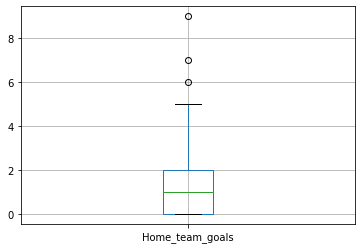

In [48]:
#Checking for outliers
#Checking for outliers for the Home team goals column
EPL.boxplot(["Home_team_goals"])

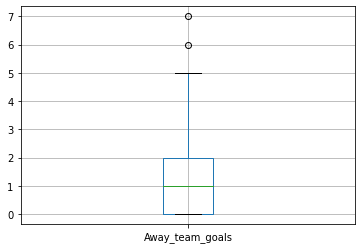

In [49]:
#checking for outliers for the Away team goalscolumn
EPL.boxplot(["Away_team_goals"])
print()

In [68]:
#Removing the outliers from the Home Team goals and Away Tea goals.
Q1 = EPL.quantile(0.25)
Q3 = EPL.quantile(0.75)
IQR = Q3 - Q1
EPL_out = EPL[~((EPL < (Q1 - 1.5 * IQR)) | (EPL > (Q3 + 1.5 * IQR))).any(axis=1)]
print(EPL)
print(EPL_out)

         Date        HomeTeam  ... Away_team_goals  Fulltime_result_winner
0    20200912          Fulham  ...               3                       0
1    20200912  Crystal Palace  ...               0                       1
2    20200912       Liverpool  ...               3                       1
3    20200912        West Ham  ...               2                       0
4    20200913       West Brom  ...               3                       0
..        ...             ...  ...             ...                     ...
375  20210523       Liverpool  ...               0                       1
376  20210523        Man City  ...               0                       1
377  20210523   Sheffield Utd  ...               0                       1
378  20210523        West Ham  ...               0                       1
379  20210523          Wolves  ...               2                       0

[380 rows x 6 columns]
         Date        HomeTeam  ... Away_team_goals  Fulltime_result_winner
0

From the number of the rows, 5 of the rows have been filtered making the data now ready for the clustering process.


Converting the Fulltime result winner column values to numerical values

The 

In [69]:
#Converting the Fulltime result winner column values to numerical values
#EPL["Fulltime_result_winner"] = np.where(EPL["Fulltime_result_winner"].str.contains("H", "A"), 1, 0)
EPL.head()

,Date,HomeTeam,AwayTeam,Home_team_goals,Away_team_goals,Fulltime_result_winner
0,20200912,Fulham,Arsenal,0,3,0
1,20200912,Crystal Palace,Southampton,1,0,1
2,20200912,Liverpool,Leeds,4,3,1
3,20200912,West Ham,Newcastle,0,2,0
4,20200913,West Brom,Leicester,0,3,0


**Stratified Sampling**


In [86]:
EPL.head(7)

,Date,HomeTeam,AwayTeam,Home_team_goals,Away_team_goals,Fulltime_result_winner
0,20200912,Fulham,Arsenal,0,3,0
1,20200912,Crystal Palace,Southampton,1,0,1
2,20200912,Liverpool,Leeds,4,3,1
3,20200912,West Ham,Newcastle,0,2,0
4,20200913,West Brom,Leicester,0,3,0
5,20200913,Spurs,Everton,0,1,0
6,20200914,Brighton,Chelsea,1,3,0


In [87]:
# checking count of the data
EPL['Home_team_goals'].value_counts()

1    130
0    111
2     73
3     42
4     15
5      6
9      1
7      1
6      1
Name: Home_team_goals, dtype: int64

In [89]:
# Non stratified sample
non_strat_output = EPL.sample(frac=0.3) 
print(non_strat_output['Home_team_goals'].value_counts())

1    47
0    32
2    19
3    12
4     3
5     1
Name: Home_team_goals, dtype: int64


In [90]:
# Stratified sample
strat_output = EPL.groupby('Home_team_goals', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.3))

# proportion of the non_stratified sample
print(strat_output['Home_team_goals'].value_counts())

1    39
0    33
2    22
3    13
4     4
5     2
Name: Home_team_goals, dtype: int64


In [91]:
# Check the stratified output
print(strat_output)


         Date     HomeTeam  ... Away_team_goals  Fulltime_result_winner
68   20201106     Brighton  ...               0                       0
94   20201129      Chelsea  ...               0                       0
176  20210117    Liverpool  ...               0                       0
154  20201230    Newcastle  ...               0                       0
350  20210513  Aston Villa  ...               0                       0
..        ...          ...  ...             ...                     ...
2    20200912    Liverpool  ...               3                       1
177  20210117     Man City  ...               0                       1
105  20201206    Liverpool  ...               0                       1
90   20201128     Man City  ...               0                       1
282  20210314    Leicester  ...               0                       1

[113 rows x 6 columns]


We then proceed to use the Simple Random Sampling Process


Simple Random Process

Generating random values using the Simple Random Process without the stratas

In [98]:
#preview the dataset
EPL.head()

,Date,HomeTeam,AwayTeam,Home_team_goals,Away_team_goals,Fulltime_result_winner
0,20200912,Fulham,Arsenal,0,3,0
1,20200912,Crystal Palace,Southampton,1,0,1
2,20200912,Liverpool,Leeds,4,3,1
3,20200912,West Ham,Newcastle,0,2,0
4,20200913,West Brom,Leicester,0,3,0


In [99]:
# Determining the size
print(EPL.shape)


(380, 6)


In [104]:
# Selecting the sample 
EPL_sample = EPL.sample(n = 50, replace="False")
print(EPL)

         Date        HomeTeam  ... Away_team_goals  Fulltime_result_winner
0    20200912          Fulham  ...               3                       0
1    20200912  Crystal Palace  ...               0                       1
2    20200912       Liverpool  ...               3                       1
3    20200912        West Ham  ...               2                       0
4    20200913       West Brom  ...               3                       0
..        ...             ...  ...             ...                     ...
375  20210523       Liverpool  ...               0                       1
376  20210523        Man City  ...               0                       1
377  20210523   Sheffield Utd  ...               0                       1
378  20210523        West Ham  ...               0                       1
379  20210523          Wolves  ...               2                       0

[380 rows x 6 columns]


**SHAPIRO-WILK TEST**

In [109]:
# Importing functions from numpy
from numpy.random import seed
from numpy.random import randn
# Importing matplotlib
from matplotlib import pyplot

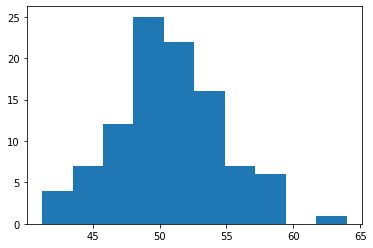

In [110]:
#We first plot a histogram 
#generate univariate observations
EPL = 5 * randn(100) + 50
# plot the histogram data
pyplot.hist(EPL)
pyplot.show()
#The is skewed to the right, though it has a Guassian shape.

Shapiro-Wilk Test

In [111]:
# imporing the shapiro function
from scipy.stats import shapiro 

In [112]:
# generating univariate observations
EPL = 5 * randn(100) + 50

# testing for normality
stat, p = shapiro(EPL)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  

Statistics=0.983, p=0.209
Sample looks Gaussian


The data has passed the nomrality test